## Data/Loading/ functions

In [4]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [5]:
#Load data
labels = np.load('Simulations\labels_test.npy')
dataset =  np.load('Simulations\y_test.npy')

#embeded datasets
pkl_filename = "embedded_dataset.txt"
pkl_filename2 = "uembedded_dataset.txt"
pkl_filename3 = "pcaembedded_dataset.txt"

#Load reduced versions of the data from file
with open(pkl_filename, 'rb') as file:
    x_embedded = pickle.load(file)
    
    
with open(pkl_filename2, 'rb') as file2:
    u_embedded = pickle.load(file2).embedding_
    

with open(pkl_filename3, 'rb') as file3:
    p_embedded = pickle.load(file3)
print(len(u_embedded))
    
range_ = np.arange(1,101,1) #useful for plotting

Sun Feb 27 22:20:30 2022 Building and compiling search function
50000


Isolating Class 
Isolating Class 
Isolating Class 
Isolating Class 
Isolating Class 
Plotting


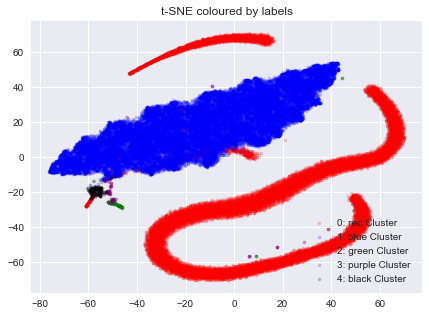

Isolating Class 
Isolating Class 
Isolating Class 
Isolating Class 
Isolating Class 
Plotting


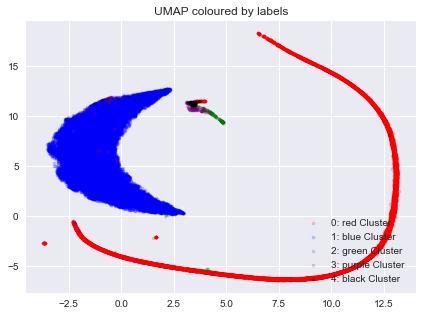

Isolating Class 
Isolating Class 
Isolating Class 
Isolating Class 
Isolating Class 
Plotting


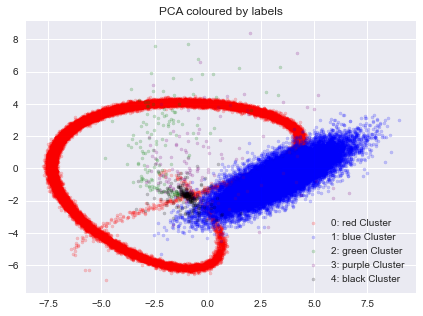

In [3]:
def groups(array,lowest_class):
    groups = []
    counter = lowest_class
    while True:
        cluster = (array == counter).sum()
        if cluster != 0:
            groups.append(cluster)
            counter += 1
        else:
            break;
        
    return groups

# plot an example from a class as given by a model

def plot_(array,cluster_number,point): #takes model predictions,class to plot from, whether to plot the
                                        #first,second or third example
    index = 0
    number = 0
    while index != len(array):
        if array[index] == cluster_number:
            plt.scatter(range_,dataset[index])
            plt.show()
            number +=1
        if number ==point:
            break;
        index +=1
    return 

#Shade Predictions according to model

def shade(embedded_dataset,predictions,numof_class,name):
    colours = ['red','blue','green','purple','black','yellow','orange','cyan','magenta']
    #First we split the dataset according predicted classes
    classes = []
    for j in range(numof_class):
        print("Isolating Class ")
        Class =[]
        for i in range(len(predictions)):
            if  predictions[i] ==j:
                Class.append(embedded_dataset[i])
        classes.append(Class)
    
    #Plotting the classses
        #Initialize plot
    plt.style.use("seaborn")
    plt.figure(figsize=(7,5))
    #plt.figure(facecolor="g")
    
    legend = []
    samples = []
    print("Plotting")
    for i in range(numof_class):
        classes[i] = np.array(classes[i])
        plt.scatter(classes[i][:,0],classes[i][:,1],s = 10,c = colours[i],alpha = 0.2)
        legend.append(str(i) +": " +colours[i] + " Cluster ")
        
    plt.legend(legend, 
               loc='lower right')
    plt.title(name)
    plt.savefig(name+"shade.png")
    plt.show()
    
    return
shade(x_embedded,labels,5,"t-SNE coloured by labels")
shade(u_embedded,labels,5,"UMAP coloured by labels")
shade(p_embedded,labels,5,"PCA coloured by labels")

    

## Performance evaluation

In [ ]:

colours = ['red','blue','green','purple','black','yellow','orange']
for i in range(5):
    for j in range(len(labels)):
        if labels[j+9] ==4:
            plt.scatter(range_,dataset[j+9],c = colours[4])
            plt.show()
            break;
        
    

## K-Means Clustering

In [74]:
#Initialize model
km = KMeans(n_clusters=2,
            init='random',
            n_init=10,
            max_iter=300,
            tol=0.0001,
            verbose=0, 
            random_state=23, 
            copy_x=True,
            algorithm='auto')

In [75]:
#Cluster and save

km = km.fit_predict(x_embedded)
pkl_filename = "KMean2D.plk"

with open(pkl_filename, 'wb') as file:
    pickle.dump(km,file)


Isolating Class 
Isolating Class 
Isolating Class 
Isolating Class 
Isolating Class 
Plotting


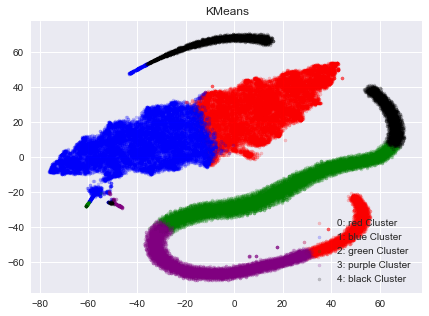

Isolating Class 
Isolating Class 
Isolating Class 
Isolating Class 
Isolating Class 
Plotting


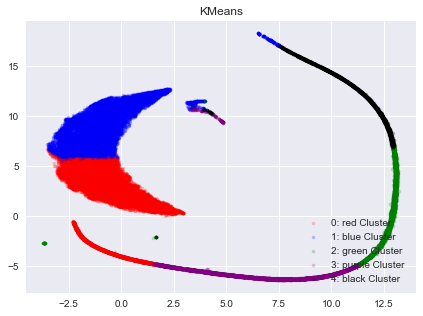

Isolating Class 
Isolating Class 
Isolating Class 
Isolating Class 
Isolating Class 
Plotting


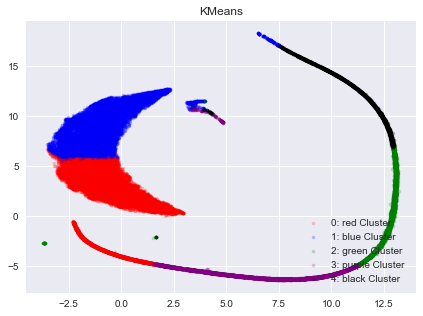

In [8]:
#Load and evaluate

pkl_filename = "KMean.plk"

with open(pkl_filename, 'rb') as file:
    km = pickle.load(file)

shade(x_embedded,km,5,"KMeans")
shade(u_embedded,km,5,"KMeans")
shade(u_embedded,km,5,"KMeans")

In [13]:
groups(km,0)
plot_(km,0,3)
plot_(km,1,3)
plot_(km,2,3)

In [15]:
print(first,second,third,well_fourth)

## Mean-Shift Clustering

In [28]:
#Libraries
from sklearn.cluster import MeanShift

In [29]:
#Initialize,train save

ms = MeanShift( bandwidth=9.5,
               seeds=None, #Default seed finding functions scale horribly with dimensions
               bin_seeding=True, #True implies initial windows are not on all points/inccurate but faster
               min_bin_freq=1,
               cluster_all=False, #Unclustered outcasts points will be labelled -1
               n_jobs=-1,
               max_iter=None,
              )
ms=ms.fit_predict(u_embedded)
pkl_filename = "Mean_Shift10CA2D.plk"
with open(pkl_filename, 'wb') as file:
    pickle.dump(ms,file)

Mean_Shift10CA2D.plk
0
[22310, 27690]
Isolating Class 
Isolating Class 
Plotting


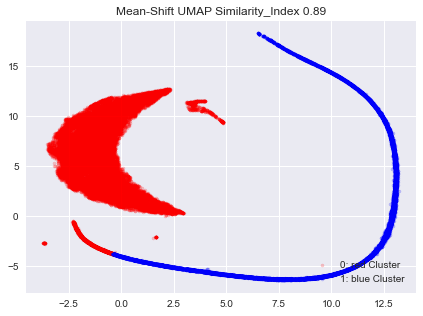

In [47]:
#Load and evaluate

pkl_filename = "Mean_Shift10CA2D.plk"
with open(pkl_filename, 'rb') as file:
    ms = pickle.load(file)

ms = np.where(ms ==-1,ms.max()+1,ms)

#shade(x_embedded,ms,ms.max()+1,"Mean_ShadeCallCA")
#shade(u_embedded,ms,ms.max()+1,"Mean_ShadeCallCA")
evaluate("Mean_Shift10CA2D.plk","Mean-Shift")


## Density Based Spatial Clustering of Applications with Noise

In [24]:
from sklearn.cluster import DBSCAN

In [42]:
dbc =  DBSCAN(eps = 50,
                 min_samples = 50,  #eps and min_samples 
                 metric = 'l1',
                 n_jobs = 10)


In [ ]:
dbc.fit(u_embedded)

In [40]:
pkl_filename = "dbscan2D.plk"

with open(pkl_filename, 'wb') as file:
    pickle.dump(dbc,file)

dbscan2D.plk
0
[]
Isolating Class 
Plotting


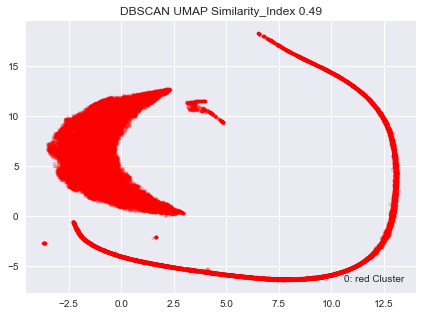

In [41]:
pkl_filename = "dbscan2D.plk"

with open(pkl_filename, 'rb') as file:
    dbc = pickle.load(file)

evaluate("dbscan2D.plk","DBSCAN")
#dbc.labels_

In [12]:
a = dbc.labels_
print(a.max())

a = np.where(a ==-1,a.max()+1,a)
shade(x_embedded[0:10000],a,a.max()+1,"dbc2d")
shade(u_embedded[0:10000],a,a.max()+1,"dbc2d")

0
Isolating Class 


IndexError: index 10000 is out of bounds for axis 0 with size 10000

## Hierachichal Density based clustering

In [6]:
import hdbscan

In [212]:
a =np.random.choice(100,100,replace = False)

In [7]:
a = np.random
hd = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=True, leaf_size=40,
    metric='euclidean', min_cluster_size=500, min_samples=100, p=1)


In [23]:
hd.fit(p_embedded)
pkl_filename = "hdbscan2Dtsne.plk"

with open(pkl_filename, 'wb') as file:
    pickle.dump(hd,file)

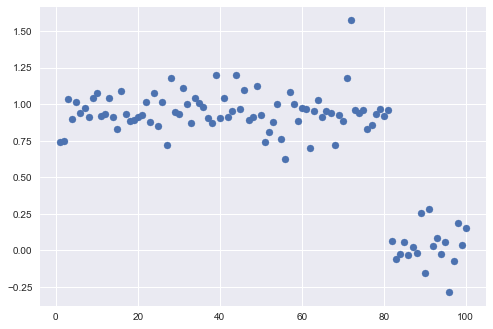

In [9]:
plot_(hd.labels_,-1,4)


hdbscan_cust500.plk
1
[939, 2663, 1398]
Isolating Class 
Isolating Class 
Isolating Class 
Plotting


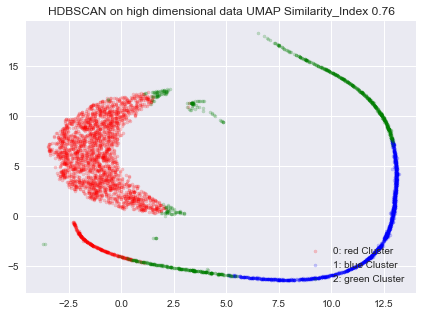

In [10]:


def evaluate(model,name):
    print(model)
    with open(model, 'rb') as file:
        hd = pickle.load(file)


    a = np.array(hd.labels_) #change to .labels_ for hdbscan
    print(a.max())
    print(groups(a,-1)) #Number of elements per cluster
    a = np.where(a==-1,a.max()+1,a)
    similarity = round(metrics.rand_score(a,labels[0:5000]),2)
    #shade(x_embedded[0:5000],a,a.max()+1,model)
    shade(u_embedded,a,a.max()+1, name + " UMAP"+ " Similarity_Index " + str(similarity))
    return


#evaluate("hdbscan_cust5.plk")
#evaluate("hdbscan_cust50.plk")
#evaluate("hdbscan_cust150.plk")
evaluate("hdbscan_cust500.plk","HDBSCAN on high dimensional data")
#evaluate("hdbscan_custu.plk")
#evaluate("hdbscan2Dtsne.plk","HDBSCAN")



## Dimensionality Reduction techniques

In [4]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap

def tsine(dataset):
    x_embedded = TSNE(n_components = 2,
                      learning_rate = 'auto',
                     init = 'random',
                      verbose = 5,
                      )
    x_embedded = x_embedded.fit_transform(dataset)

    #Save 2D represenatation

    pkl_filename = "embedded_dataset.txt"
    #Load from file
    with open(pkl_filename, 'wb') as file:
        pickle.dump(x_embedded,file) 
    print(x_embedded)
    return x_embedded

def umpap(dataset):
    reducer = umap.UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=True)
    
    u_embedded = reducer.fit(dataset)
        #Save 2D represenatation

    pkl_filename = "uembedded_dataset.txt"
    #Load from file
    with open(pkl_filename, 'wb') as file:
        pickle.dump(u_embedded,file) 
        
    return u_embedded

def pca(dataset):
    pca = PCA(n_components=2,
              copy=True,
              whiten=False,
              svd_solver='auto',
              tol=0.0, iterated_power='auto',
              random_state=None)
    pca = pca.fit_transform(dataset)
    
    #Save 2D represenatation

    pkl_filename = "pcaembedded_dataset.txt"
    #Load from file
    with open(pkl_filename, 'wb') as file:
        pickle.dump(pca,file) 
        
    return pca
      
%time

Wall time: 0 ns


In [ ]:
tsine(dataset)

In [18]:
u_embedded.embedding_

array([[-0.9706506 ,  9.241809  ],
       [ 0.6077997 ,  1.5494629 ],
       [-2.187697  ,  4.8194346 ],
       ...,
       [-0.38690725,  9.1743145 ],
       [12.691327  ,  8.978811  ],
       [ 0.92778224, -4.536303  ]], dtype=float32)

## Playing around

In [26]:
# Dropout Feature extraction
from numpy import random
np.random.randint(100)

def droppout(dataset):
    pickle_name = "datadroppout3.plk"
    new_dataset = []
    
    for i in range(len(dataset)):
        data_point = []                          # reduced array to be appended
        
        for j in range(10):
            
            data_point.append(dataset[i][10*j])

            
        new_dataset.append(data_point)
    with open(pkl_filename, 'wb') as file:
        pickle.dump(new_dataset,file)
        
    return len(dataset[0]),len(new_dataset[0])
    
            

droppout(dataset) 

(100, 10)

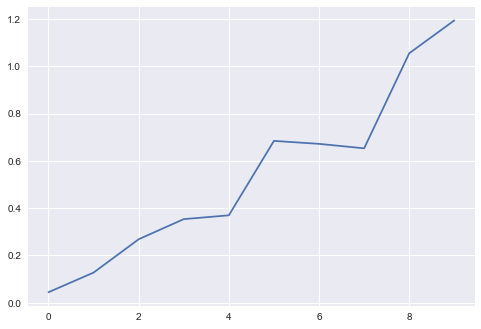

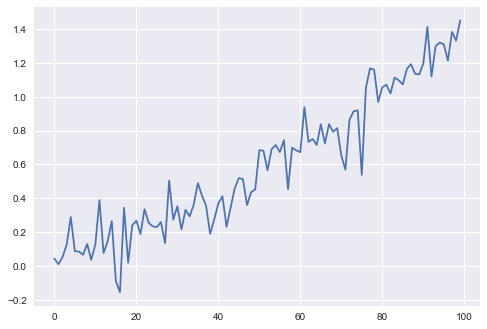

In [163]:
plt.plot(reduced_dataset[4133])
plt.show()
plt.scatter(dataset[4133])
plt.show()


In [10]:
pickle_name = "datadroppout3.plk"

with open(pkl_filename, 'rb') as file:
    reduced_dataset = pickle.load(file)
    
hd = hdbscan.HDBSCAN(min_cluster_size = 20,
                     min_samples = 4000)

hd.fit(reduced_dataset)

ValueError: Expected 2D array, got scalar array instead:
array=HDBSCAN(metric='minkowski', min_cluster_size=50, min_samples=5, p=0.125).
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

1
[15221, 10411, 24368]
[ 1 -1  1 ...  1 -1 -1]
Isolating Class 
Isolating Class 
Isolating Class 
Plotting


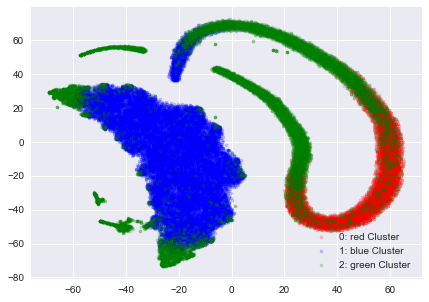

In [164]:
a = np.array(hd.labels_)
print(a.max())
print(groups(a,-1)) #Number of elements per cluster
a = np.where(a==-1,a.max()+1,a)
print(hd.labels_)

shade(x_embedded,a,a.max()+1,"reduced_hdbscan_min_samples4_mincluster100")

In [52]:
with open('Simulations\train-images.idx3-ubyte','rb') as images:
    a = images.read()
with open('Simulations\train-labels.idx1-ubyte','rb') as imlabels:
    b = imlabels.read()

OSError: [Errno 22] Invalid argument: 'Simulations\train-images.idx3-ubyte'

In [64]:
import pandas as pd
a = pd.read_csv('Simulations\mnist_train.csv').to_numpy()

In [11]:
for i in range(1,50):
    print( sum(dataset[i]**(0.5))**(1/0.5))

6900.570142260156
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
5858.672109924362
nan
nan
5798.897736083534
nan
nan
nan
nan
5944.725014712371
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
9928.888417383725
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


C:\Users\Koketso\AppData\Local\Temp/ipykernel_8860/1674010363.py:2: RuntimeWarning: invalid value encountered in sqrt
  print( sum(dataset[i]**(0.5))**(1/0.5))
